In [1]:
import astunparse

from moa.frontend import MOAParser
from moa.visualize import visualize_ast, print_ast
from moa.shape import calculate_shapes
from moa.reduction import reduce_ast
from moa.backend import python_backend

parser = MOAParser()

# Frontend

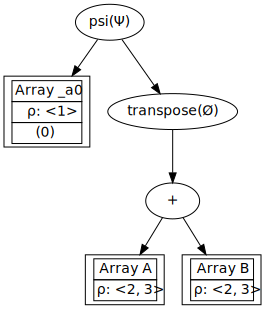

In [2]:
symbol_table, tree = parser.parse('<0> psi (tran(A ^ <2 3> + B ^ <2 3>))')
visualize_ast(symbol_table, tree)

# Shape Analysis

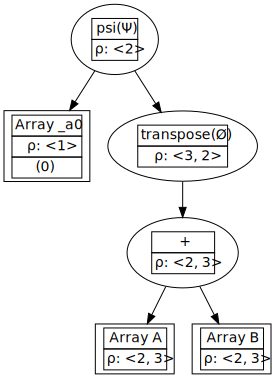

In [3]:
shape_symbol_table, shape_tree = calculate_shapes(symbol_table, tree)
visualize_ast(shape_symbol_table, shape_tree)

# Reduction

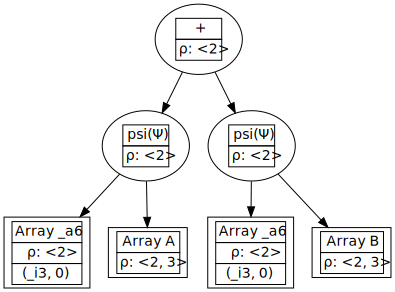

In [5]:
symbol_table, reduced_ast = reduce_ast(symbol_table, shape_tree)
visualize_ast(symbol_table, reduced_ast)

# Backend (Python)

In [6]:
ast = python_backend(symbol_table, reduced_ast)
print(astunparse.dump(ast))

BinOp(
  left=Subscript(
    value=Name(
      id='A',
      ctx=Load()),
    slice=Index(value=Tuple(
      elts=[
        Str(s='_i3'),
        Num(n=0)],
      ctx=Load())),
    ctx=Load()),
  op=Add(),
  right=Subscript(
    value=Name(
      id='B',
      ctx=Load()),
    slice=Index(value=Tuple(
      elts=[
        Str(s='_i3'),
        Num(n=0)],
      ctx=Load())),
    ctx=Load()))


In [7]:
print(astunparse.unparse(ast))

(A[('_i3', 0)] + B[('_i3', 0)])

